# FUNCIONES


In [ ]:
def

# LIBRERIAS

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# LIMPIEZA DE DATOS



##1. El proyecto

Descripción del Proyecto: Analizar el comportamiento de los usuarios que
abandonan el carrito de compras en un sitio web de e-commerce para identificar
posibles razones y proponer estrategias de retenció

##2. El set de datos


1. age= age
2. gender= gender
3. Purchase_Frequency= How frequently do you make purchases on Amazon?
4. Purchase_Categories= What product categories do you typically purchase on Amazon?
5. Personalized_Recommendation_Frequency = Have you ever made a purchase based on personalized product recommendations from Amazon?
6. Browsing_Frequency =How often do you browse Amazon's website or app?
7. Product_Search_Method =How do you search for products on Amazon?
8. Search_Result_Exploration =Do you tend to explore multiple pages of search results or focus on the first page?
9. Customer_Reviews_Importance =How important are customer reviews in your decision-making process?
10. Add_to_Cart_Browsing =Do you add products to your cart while browsing on Amazon?
11. Cart_Completion_Frequency =How often do you complete the purchase after adding products to your cart?
12. Cart_Abandonment_Factors =What factors influence your decision to abandon a purchase in your cart?
13. Saveforlater_Frequency =Do you use Amazon's "Save for Later" feature, and if so, how often?
14. Review_Left =Have you ever left a product review on Amazon?
15. Review_Reliability =How much do you rely on product reviews when making a purchase?
16. Review_Helpfulness =Do you find helpful information from other customers' reviews?
17. Personalized_Recommendation_Frequency =How often do you receive personalized product recommendations from Amazon?
18. Recommendation_Helpfulness =Do you find the recommendations helpful?
19. Rating_Accuracy =How would you rate the relevance and accuracy of the recommendations you receive
20. Shopping_Satisfaction =How satisfied are you with your overall shopping experience on Amazon?
23. Service_Appreciation =What aspects of Amazon's services do you appreciate the most?
24. Improvement_Areas =Are there any areas where you think Amazon can improve?

##3. Una primera mirada al dataset

In [2]:
# Lectura
ruta = "/content/drive/MyDrive/No country/Amazon Customer Behavior Survey.csv"
data = pd.read_csv(ruta)

In [3]:
print(data.shape)
data.head()

(602, 23)


,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [4]:
# Veamos las variables categóricas y las numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [5]:
data.isna().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

##4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

### 4.1 Datos faltantes

Acá comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:

In [6]:
treshold=len(data)*0.05
cols_to_drop=data.columns[data.isna().sum()<=treshold]
print(cols_to_drop)

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object')


In [7]:
data.dropna(subset=cols_to_drop,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               600 non-null    object
 1   age                                     600 non-null    int64 
 2   Gender                                  600 non-null    object
 3   Purchase_Frequency                      600 non-null    object
 4   Purchase_Categories                     600 non-null    object
 5   Personalized_Recommendation_Frequency   600 non-null    object
 6   Browsing_Frequency                      600 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               600 non-null    object
 9   Customer_Reviews_Importance             600 non-null    int64 
 10  Add_to_Cart_Browsing                    600 non-null    object
 11  Cart_C

In [8]:
data.isna().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     0
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

###4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**.
- **Una columna categórica pero con un sólo nivel**.
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los vlaores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

In [9]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_object=data.select_dtypes("object").columns

for col in cols_object:
  print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna Timestamp: 599 subniveles
Columna Gender: 4 subniveles
Columna Purchase_Frequency: 5 subniveles
Columna Purchase_Categories: 29 subniveles
Columna Personalized_Recommendation_Frequency: 3 subniveles
Columna Browsing_Frequency: 4 subniveles
Columna Product_Search_Method: 4 subniveles
Columna Search_Result_Exploration: 2 subniveles
Columna Add_to_Cart_Browsing: 3 subniveles
Columna Cart_Completion_Frequency: 5 subniveles
Columna Cart_Abandonment_Factors: 4 subniveles
Columna Saveforlater_Frequency: 5 subniveles
Columna Review_Left: 2 subniveles
Columna Review_Reliability: 5 subniveles
Columna Review_Helpfulness: 3 subniveles
Columna Recommendation_Helpfulness: 3 subniveles
Columna Service_Appreciation: 9 subniveles
Columna Improvement_Areas: 18 subniveles


Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

In [10]:
data.describe()

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,600.000000,600.000000,600.000000,600.000000,600.000000
mean,30.780000,2.481667,2.700000,2.671667,2.463333
std,10.180914,1.185470,1.043303,0.901046,1.013427
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

###4.3 Filas repetidas

In [11]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (600, 23)
Tamaño del set después de eliminar las filas repetidas: (600, 23)


###4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

In [12]:
cols_number=data.select_dtypes("number").columns
print(len(cols_number))

5


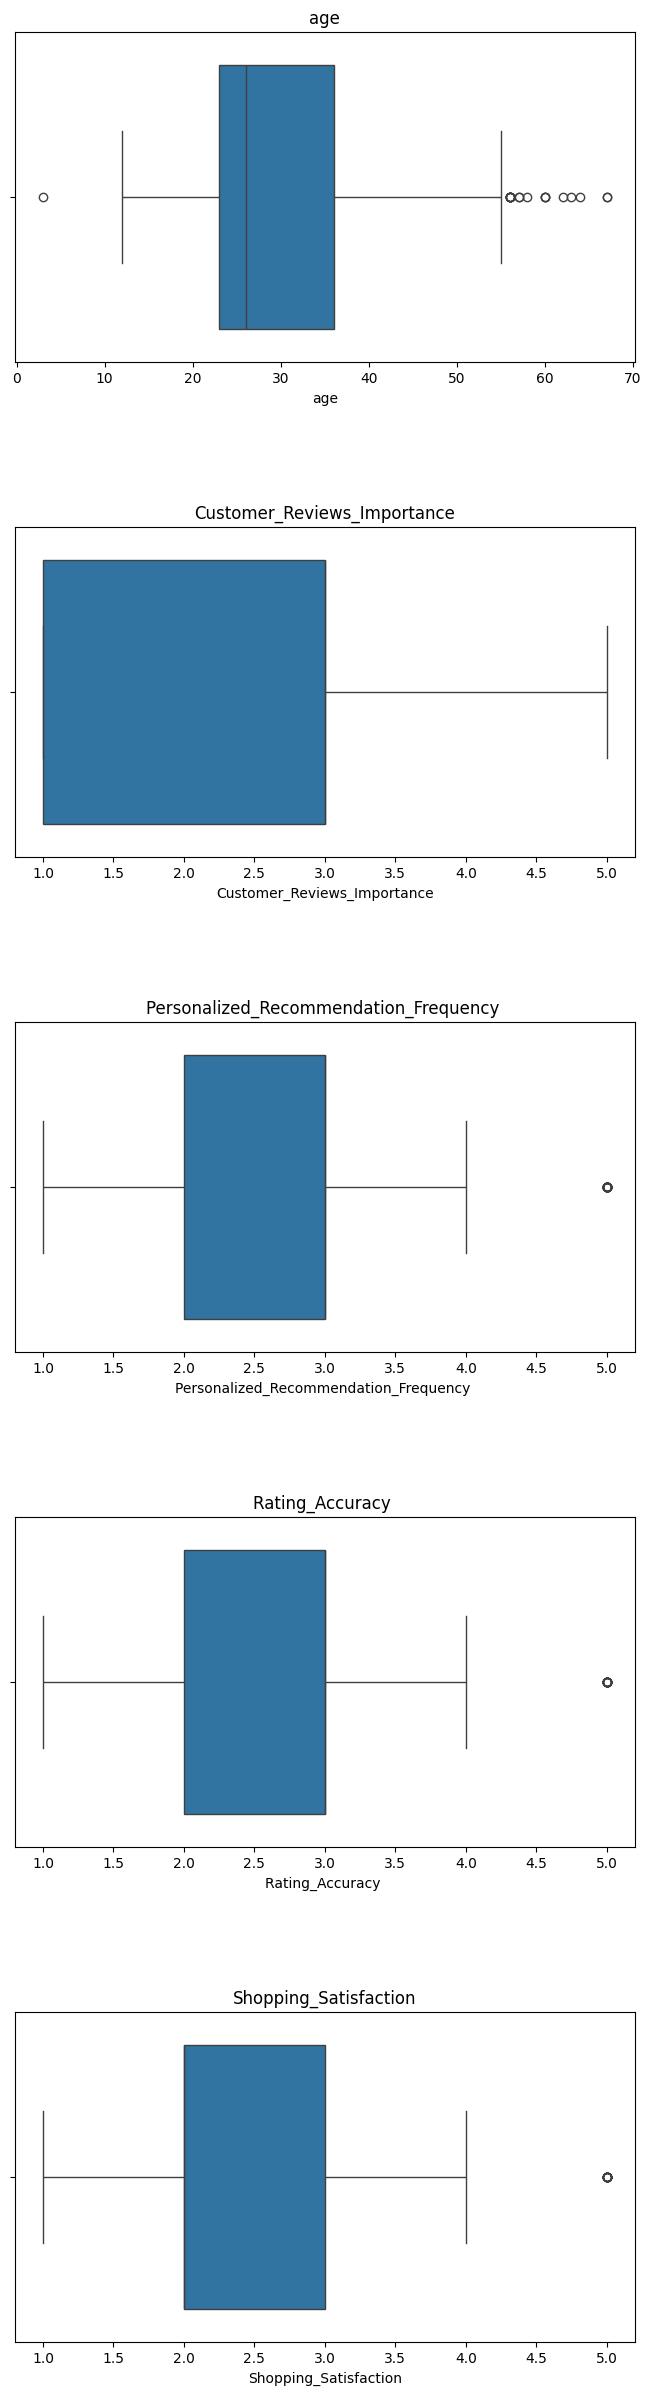

In [13]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_number=data.select_dtypes("number").columns

fig, ax = plt.subplots(nrows=len(cols_number), ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_number):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

**Observaciones:**
-no se eliminaron outliers ya que los datos se ven coherentes

###4.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles que esten mal escritas o que se repitan y tengan ciertas letras erroneas

Se deben unificar estos sub-niveles

In [14]:
cols_columns_object=cols_object[1:]
print(cols_columns_object)
print("*"*20)

Index(['Gender', 'Purchase_Frequency', 'Purchase_Categories',
       'Personalized_Recommendation_Frequency', 'Browsing_Frequency',
       'Product_Search_Method', 'Search_Result_Exploration',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Recommendation_Helpfulness', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object')
********************


In [15]:
# Graficar los subniveles de cada variable categórica
cols_columns_object=cols_object[1:]
for column in cols_columns_object:
  print("*"*20)
  print(data[column].value_counts())
  print("*"*20)

********************
Female               350
Male                 142
Prefer not to say     89
Others                19
Name: Gender, dtype: int64
********************
********************
Few times a month         202
Less than once a month    124
Once a week               112
Once a month              106
Multiple times a week      56
Name: Purchase_Frequency, dtype: int64
********************
********************
Beauty and Personal Care                                                                            106
Clothing and Fashion                                                                                105
others                                                                                               48
Beauty and Personal Care;Clothing and Fashion                                                        46
Beauty and Personal Care;Clothing and Fashion;Home and Kitchen                                       42
Groceries and Gourmet Food;Beauty and Personal Care;Clothin

In [16]:
#convertir fecha a tipo data time
data["Timestamp"]=pd.to_datetime(data["Timestamp"])

In [17]:
data

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023-06-04 13:28:19-05:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023-06-04 14:30:44-05:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023-06-04 17:04:56-05:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023-06-04 17:13:00-05:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023-06-04 17:28:06-05:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2023-06-12 16:02:02-05:30,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness
598,2023-06-12 16:02:53-05:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,...,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste
599,2023-06-12 16:03:59-05:30,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,...,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy
600,2023-06-12 21:57:20-05:30,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,...,Sometimes,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy


In [18]:
data["Timestamp"]=pd.to_datetime(data["Timestamp"])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype                                 
---  ------                                  --------------  -----                                 
 0   Timestamp                               600 non-null    datetime64[ns, pytz.FixedOffset(-330)]
 1   age                                     600 non-null    int64                                 
 2   Gender                                  600 non-null    object                                
 3   Purchase_Frequency                      600 non-null    object                                
 4   Purchase_Categories                     600 non-null    object                                
 5   Personalized_Recommendation_Frequency   600 non-null    object                                
 6   Browsing_Frequency                      600 non-null    object                            

# ANLISIS EXPLORATORIO

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (?)

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

##4.1 Análisis de cada variable de manera individual

Nos permite entender las características generales de cada variable de nuestro set de datos.

In [20]:
# Con data.info() podemos ver las variables categóricas
# (Dtype=object)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype                                 
---  ------                                  --------------  -----                                 
 0   Timestamp                               600 non-null    datetime64[ns, pytz.FixedOffset(-330)]
 1   age                                     600 non-null    int64                                 
 2   Gender                                  600 non-null    object                                
 3   Purchase_Frequency                      600 non-null    object                                
 4   Purchase_Categories                     600 non-null    object                                
 5   Personalized_Recommendation_Frequency   600 non-null    object                                
 6   Browsing_Frequency                      600 non-null    object                            

<ipython-input-21-c398cb67ce33>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-21-c398cb67ce33>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-21-c398cb67ce33>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-21-c398cb67ce33>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-21-c398cb67ce33>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-21-c398cb67ce33>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i]

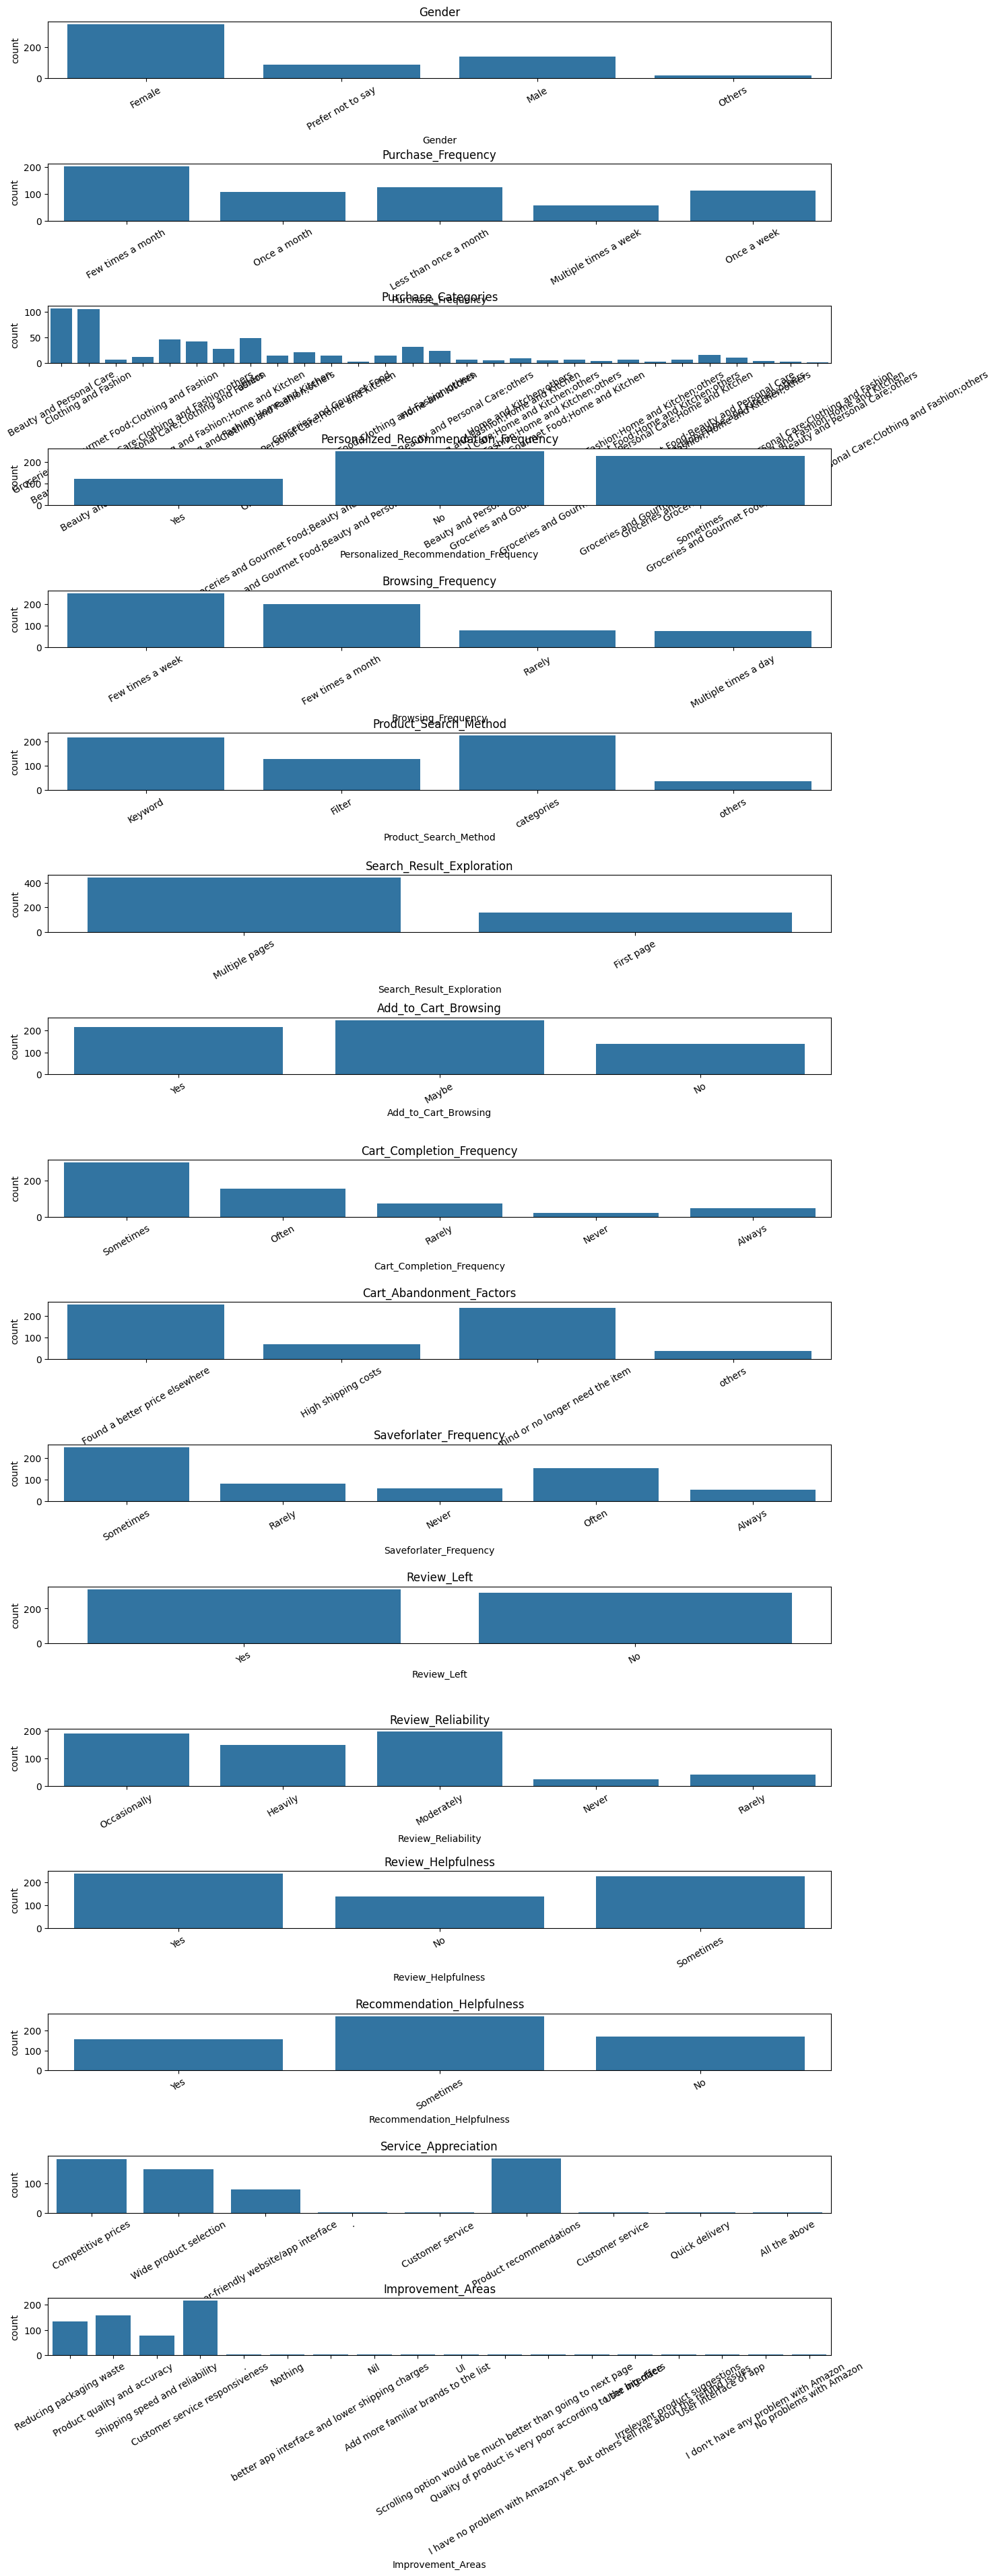

In [21]:
# Tomemos las variables categóricas y generemos gráficos de barras
cols_object=data.select_dtypes("object").columns
# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(cols_object), ncols=1, figsize=(15,45))
fig.subplots_adjust(hspace=1.5)

for i, col in enumerate(cols_object):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

**Observaciones:**

* la mayoria de los usuarios son mujeres , por consecuencia se aprecia que la mayoria de productos comprados son productos de belleza, ropas y accesorios.
* la mayoria de las compras en amazon no han sido por productos personalmente recomendados al usuario.
* la mayoria de los usuarios buscan productos por categorias y palabras clave.
* muy pocos usuarios completan siempre los carritos despues de agregar los productos al carrito.
* los motivos mas frecuentes de abandono de carritos son porque encontraron un mejor precio en otra parte , y por que ya no necesitaron el producto.
* se puede observar que las reviews son importantes al momento de abandonar un carrito.
* se puede observar que la mayoria de los usuarios encuentran en su gran parte beneficioso las reviews.
* la mayoria de los usuarios aprecian , los precios competitivos, la variedad de productos , la interfaz de la app, y las recomendaciones de los productos.
* la mayoria de los usuarios piensan que amazon debe mejorar en los siguientes aspectos: reducir el desperdicio de paquetes,la calidad de producto, la velocidad de entrega -confiabilidad , y capacidad de respuesta del servicio al cliente.

Veamos inicialmente el comportamiento de las variables numéricas ('age' y 'balance')

In [ ]:
# Podemos extraer algunas variables estadísticas descriptivas básicas
data.describe()

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,600.000000,600.000000,600.000000,600.000000,600.000000
mean,30.780000,2.481667,2.700000,2.671667,2.463333
std,10.180914,1.185470,1.043303,0.901046,1.013427
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


In [22]:
cols_number

Index(['age', 'Customer_Reviews_Importance',
       'Personalized_Recommendation_Frequency ', 'Rating_Accuracy ',
       'Shopping_Satisfaction'],
      dtype='object')

In [23]:
def plot_numeric_histogram(data, cols_number):
    """
    Dibuja histogramas para columnas numéricas, mostrando una gráfica a la vez.

    Parameters:
    - data: DataFrame, el conjunto de datos.
    - cols_number: Lista, lista de nombres de columnas numéricas a graficar.
    """
    for col in cols_number:
        plt.figure(figsize=(8, 5))
        if col == 'age':
            nbins = 10
        else:
            nbins = 50
        sns.histplot(x=col, data=data, bins=nbins, kde=True)
        plt.title(f'Histograma de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.show()


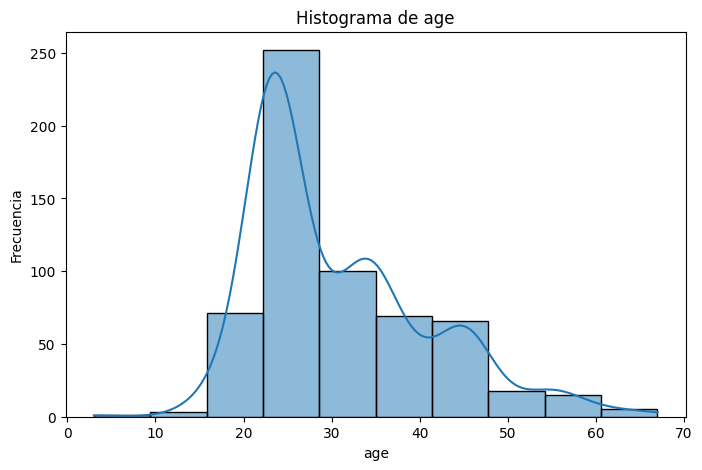

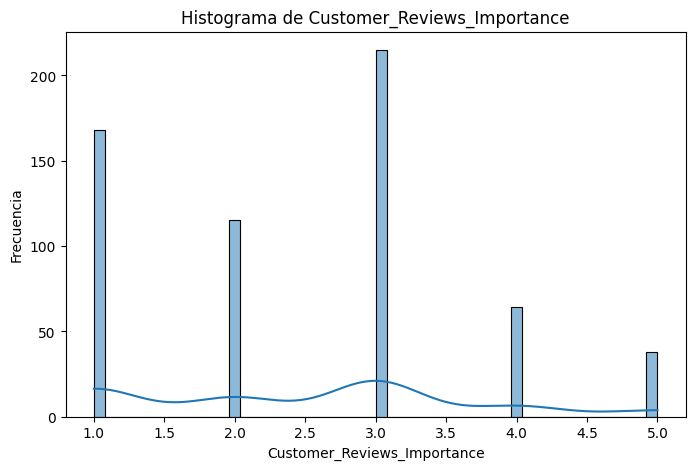

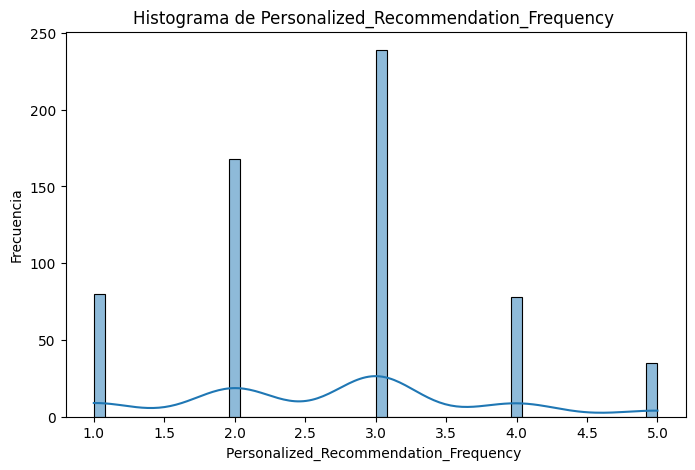

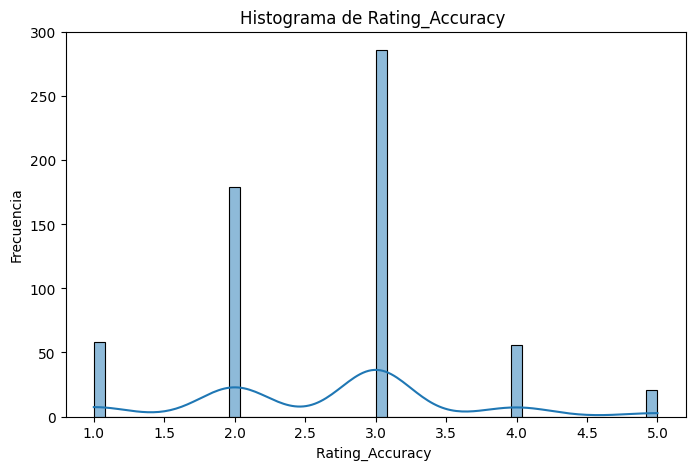

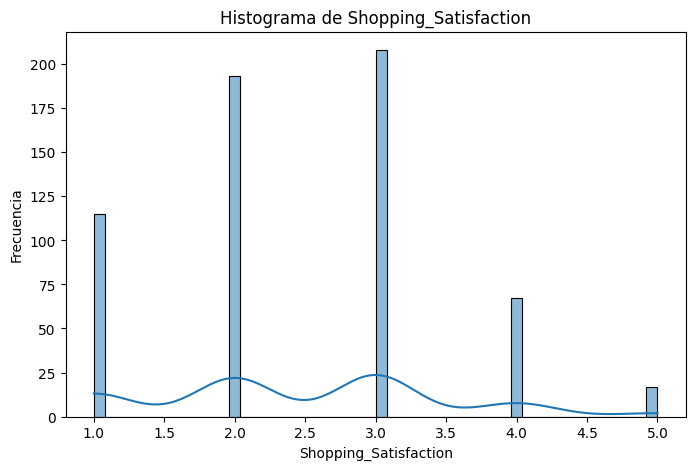

In [25]:
# Llamada a la función con tu conjunto de datos y columnas numéricas
plot_numeric_histogram(data, cols_number)

In [27]:
data["Customer_Reviews_Importance"].describe()

count    600.000000
mean       2.481667
std        1.185470
min        1.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: Customer_Reviews_Importance, dtype: float64

In [28]:
data["Personalized_Recommendation_Frequency "].describe()

count    600.000000
mean       2.700000
std        1.043303
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: Personalized_Recommendation_Frequency , dtype: float64

In [30]:
data["Shopping_Satisfaction"].describe()

count    600.000000
mean       2.463333
std        1.013427
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Shopping_Satisfaction, dtype: float64

**Observaciones:**

- La mayor parte de los usuarios tienen edades entre 20 y 30 años
- la variable Customer_Reviews_Importance parece tener una distribución que se centra alrededor de valores moderados, con cierta variabilidad en las respuestas de los usuarios. La mayoría asigna una importancia moderada, pero hay usuarios que asignan tanto valores bajos como altos.
- la variable "Personalized_Recommendation_Frequency" parece tener una distribución centrada en valores moderados, con cierta variabilidad en las respuestas de los usuarios.
-  La mayoría tiene una satisfacción moderada, pero hay usuarios con niveles tanto bajos como altos de satisfacción.
